# Positional Encoding – Beispiel und Intuition

Warum Reihenfolge wichtig ist und wie sinusförmige Positionskodierung hilft.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)


## 1) Ohne Position: gleiche Tokenmenge, andere Reihenfolge

In [2]:
vocab = {
    "Hund": np.array([1.0, 0.2, 0.1, 0.0]),
    "beisst": np.array([0.1, 1.0, 0.2, 0.1]),
    "Mann": np.array([0.8, 0.1, 0.9, 0.0]),
}
seq_a = ["Hund", "beisst", "Mann"]
seq_b = ["Mann", "beisst", "Hund"]
XA = np.vstack([vocab[t] for t in seq_a])
XB = np.vstack([vocab[t] for t in seq_b])

print("Summe seq_a:", XA.sum(axis=0))
print("Summe seq_b:", XB.sum(axis=0))
print("Gleich?", np.allclose(XA.sum(axis=0), XB.sum(axis=0)))


Summe seq_a: [1.9 1.3 1.2 0.1]
Summe seq_b: [1.9 1.3 1.2 0.1]
Gleich? True


## 2) Sinusförmige Positional Encoding erzeugen

In [3]:
def positional_encoding(n_pos, d_model):
    pe = np.zeros((n_pos, d_model), dtype=float)
    positions = np.arange(n_pos)[:, None]
    div_terms = np.exp(np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
    pe[:, 0::2] = np.sin(positions * div_terms)
    pe[:, 1::2] = np.cos(positions * div_terms)
    return pe

PE = positional_encoding(6, 4)
pd.DataFrame(PE, columns=["d0","d1","d2","d3"]).round(4)


,d0,d1,d2,d3
0,0.0000,1.0000,0.00,1.0000
1,0.8415,0.5403,0.01,1.0000
2,0.9093,-0.4161,0.02,0.9998
3,0.1411,-0.9900,0.03,0.9996
4,-0.7568,-0.6536,0.04,0.9992
5,-0.9589,0.2837,0.05,0.9988


## 3) Embeddings + Position addieren

In [4]:
XA_pos = XA + PE[:len(seq_a)]
XB_pos = XB + PE[:len(seq_b)]

print("Seq A (mit Position):")
print(pd.DataFrame(XA_pos, index=[f"{i}:{t}" for i, t in enumerate(seq_a)], columns=["d0","d1","d2","d3"]).round(4))
print("\nSeq B (mit Position):")
print(pd.DataFrame(XB_pos, index=[f"{i}:{t}" for i, t in enumerate(seq_b)], columns=["d0","d1","d2","d3"]).round(4))


Seq A (mit Position):
              d0      d1    d2      d3
0:Hund    1.0000  1.2000  0.10  1.0000
1:beisst  0.9415  1.5403  0.21  1.1000
2:Mann    1.7093 -0.3161  0.92  0.9998

Seq B (mit Position):
              d0      d1    d2      d3
0:Mann    0.8000  1.1000  0.90  1.0000
1:beisst  0.9415  1.5403  0.21  1.1000
2:Hund    1.9093 -0.2161  0.12  0.9998


## 4) Gleiches Token an anderer Position vergleichen

In [5]:
hund_pos0 = vocab["Hund"] + PE[0]
hund_pos2 = vocab["Hund"] + PE[2]
print("Hund + PE(0):", np.round(hund_pos0, 4))
print("Hund + PE(2):", np.round(hund_pos2, 4))
print("L2-Distanz:", round(np.linalg.norm(hund_pos0 - hund_pos2), 4))


Hund + PE(0): [1.  1.2 0.1 1. ]
Hund + PE(2): [ 1.9093 -0.2161  0.12    0.9998]
L2-Distanz: 1.6831


## 5) Visualisierung

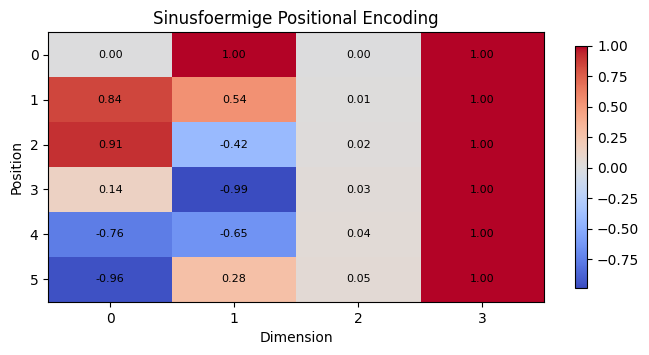

In [6]:
fig, ax = plt.subplots(figsize=(8, 3.5))
im = ax.imshow(PE, cmap="coolwarm", aspect="auto")
ax.set_title("Sinusfoermige Positional Encoding")
ax.set_xlabel("Dimension")
ax.set_ylabel("Position")
ax.set_xticks(range(PE.shape[1]))
ax.set_yticks(range(PE.shape[0]))
for i in range(PE.shape[0]):
    for j in range(PE.shape[1]):
        ax.text(j, i, f"{PE[i,j]:.2f}", ha="center", va="center", fontsize=8)
fig.colorbar(im, ax=ax, shrink=0.9)
plt.show()


## 6) Einordnung

- Ohne Positionsinfo kann ein Modell Reihenfolge nicht sauber unterscheiden.
- Positional Encoding macht Token an Position 0/1/2 unterscheidbar.
- Reale Modelle nutzen auch learned PE oder RoPE.